In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
file_path = './nw.hsa_mgdb_3.0_premirna.WGD_flag.intragenic_flag.7mer.s5.tsv'

df = pd.read_csv(file_path, sep='\t', header=None)
df

,0,1,2,3,4
0,Hsa-Mir-33-P1,Hsa-Mir-33-P3,45.0,WGD,WGD_intragenic
1,Hsa-Mir-26-P2,Hsa-Mir-26-P4,46.0,WGD,WGD_intragenic
2,Hsa-Mir-26-P1,Hsa-Mir-26-P4,50.0,WGD,WGD_intragenic
3,Hsa-Mir-26-P1,Hsa-Mir-26-P2,46.0,WGD,WGD_intragenic
4,Hsa-Mir-218-P2,Hsa-Mir-218-P4,49.0,WGD,WGD_intragenic
...,...,...,...,...,...
2298,Hsa-Let-7-P1b,Hsa-Let-7-P2b2,44.0,SSD,NaN
2299,Hsa-Let-7-P1b,Hsa-Let-7-P2b1,46.0,SSD,NaN
2300,Hsa-Let-7-P1b,Hsa-Let-7-P2a3,46.0,SSD,NaN
2301,Hsa-Let-7-P1b,Hsa-Let-7-P2a2,48.0,SSD,NaN


In [38]:
df_wgd = df[df[3] == 'WGD']
df_wgd_intragenic = df_wgd[df_wgd[4] == 'WGD_intragenic']
df_ssd = df[df[3] == 'SSD']

In [39]:
df_wgd_scores = df_wgd[2].astype(int)
df_ssd_scores = df_ssd[2].astype(int)
df_wgd_intragenic_scores = df_wgd_intragenic[2].astype(int)

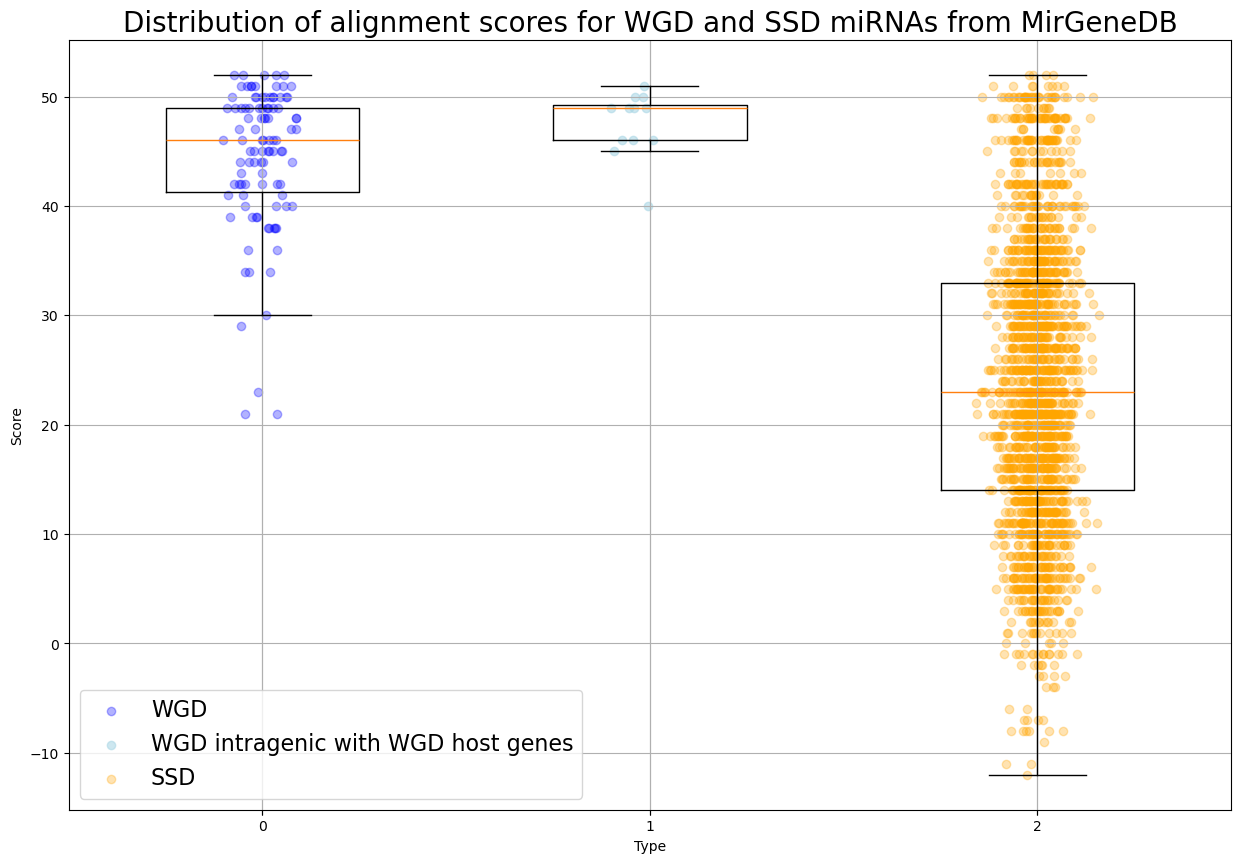

In [49]:
# plot the distribution of scores as boxplots with jitter
plt.figure(figsize=(15, 10))
plt.title('Distribution of alignment scores for WGD and SSD miRNAs from MirGeneDB', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Score')
plt.xticks([0, 1, 2], ['WGD', 'WGD intragenic with WGD host genes', 'SSD'])
plt.boxplot([df_wgd_scores, df_wgd_intragenic_scores, df_ssd_scores], positions=[0, 1, 2], widths=0.5, notch=False, showfliers=False)
plt.scatter(np.random.normal(0, 0.05, size=len(df_wgd_scores)), df_wgd_scores, alpha=0.3, color='blue', label='WGD')
plt.scatter(np.random.normal(1, 0.05, size=len(df_wgd_intragenic_scores)), df_wgd_intragenic_scores, alpha=0.6, color='lightblue', label='WGD intragenic with WGD host genes')
plt.scatter(np.random.normal(2, 0.05, size=len(df_ssd_scores)), df_ssd_scores, alpha=0.3, color='orange', label='SSD')
plt.legend(fontsize=16, loc='lower left')
plt.grid()
plt.show()